# Hoja de Trabajo 2

## Problema 1

Desarrolle una función que permita hacer la binarizaci´on de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [4]:
##Cargamos las librerias que nos servirán
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
##Desarrollo de la función para la Binarización de la Imagen
def Binarization_Image(imagen,threshold = 128 ):
    
    #Usaremos el Metodo del Umbral para binarizar la imagen.
    #Si excede el Umbral (threshold es blanco, sino es Negro)
    
    #Vemos las Dimensiones de la Imagen, si aún es una imagen a color se convierte a escala de Grises
    if imagen.ndim > 2:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    #De lo contrario ya viene en escala de grises
    
    #Determinamos el ancho y largo
    ancho = imagen.shape[0]
    alto = imagen.shape[1]
    
    #Aquí almacenaremos la imagen binarizada
    Imagen_bin= np.zeros((ancho, alto))
    
    #Efectuamos la operación
    Imagen_bin = (imagen>threshold)*255

    #Retornamos la imagen transformada
    return Imagen_bin

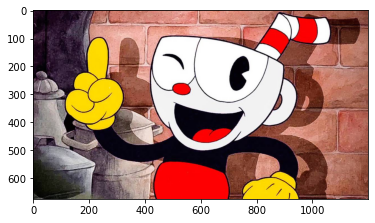

In [9]:
#Cargamos la imagen de Prueba
img = cv2.imread('cuphead.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

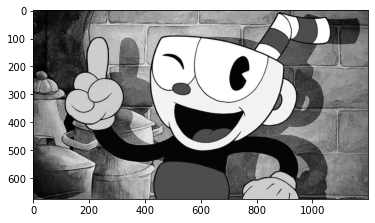

In [6]:
imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(imggray, cmap='gray')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


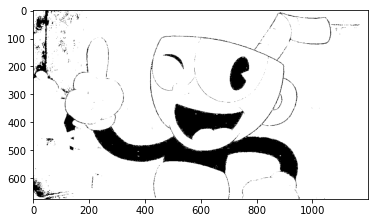

In [26]:
imgbin=Binarization_Image(img,10)
plt.imshow(imgbin,cmap='gray')

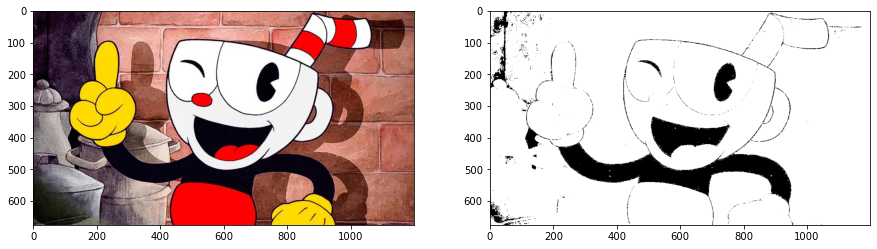

In [34]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False)
axes[0].imshow(img)
axes[1].imshow(imgbin, cmap='gray')
plt.show()

## Problema 2

Desarrolle una funci´on que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND,OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [230]:
##Desarrollo de la función que nos permitirá realizar operaciones sobre dos imagenes
def Operaciones_Imagen2(imagen1,imagen2, operacion,transpanrency_img1=1, transpanrency_img2=1, threshold = 128 ):

    #Se asume lo siguiente:
    ## - Las imagenes ya fueron obtenidas y se encuentran como un Tensores(matriz)
    ## - Las imagenes esta en formato RGB
    ## - Para Facilidad - Las imagenes tienen el mismo tamaño
    
    ##La operación a realizar dependerá del parametro operación
    ##Podrá tener los siguientes valores
    ##"SUMA" -> Suma de Imagenes
    ##"RESTA" -> Resta de Imagenes
    ##"AND" -> Operacion Logica AND
    ##"OR" -> Operacion Logica OR
    ##"XOR" -> Operacion Logica XOR
    
    #Determinamos el ancho y largo
    #Se asume que ambas imagenes tienen el mismo ancho y largo - Por facilidad
    ancho = imagen1.shape[0]
    alto = imagen1.shape[1]
    
    #Aquí almacenaremos la imagen binarizada
    Imagen_Op= np.zeros((ancho, alto))
    
    #Si hacemos la operación suma
    if operacion == "SUMA":
        
        #Además de la suma vamos a usar los parametros de Transparencia de la imagen para
        #mejorar la visualización de las mismas
        Imagen_Op= np.multiply(imagen1,transpanrency_img1).astype('uint8') + np.multiply(imagen2,transpanrency_img2).astype('uint8')
    
    #Si hacemos la operación Resta
    elif operacion == "RESTA":
        
        #Aplicamos la resta de las imagenes
        Imagen_Op= imagen1 - imagen2
        
        #Recorremos cada pixel de la imagen
        for i in range(0, ancho):
            for j in range(0, alto):
                #Obtenemos cada porción del Color y se resta el menor menos el mayor
                #Se hace manual ya que al ser tipo de dato uInt da algunos resultados que se me ha dificultado manejar
                imgR = imagen1[i, j][0] - imagen2[i, j][0] if imagen1[i, j][0]>imagen2[i, j][0] else imagen2[i, j][0] - imagen1[i, j][0]
                imgG = imagen1[i, j][1] - imagen2[i, j][1] if imagen1[i, j][1]>imagen2[i, j][1] else imagen2[i, j][1] - imagen1[i, j][1]
                imgB = imagen1[i, j][2] - imagen2[i, j][2] if imagen1[i, j][2]>imagen2[i, j][2] else imagen2[i, j][2] - imagen1[i, j][2]
                #print(imgR,imgG,imgB)
                Imagen_Op[i,j] = np.array([imgR,imgG,imgB])
                
    elif operacion == "AND":
        
        #Usaremos el Metodo del Umbral para binarizar la imagen.
        #Si excede el Umbral (threshold es blanco, sino es Negro)

        #Vemos las Dimensiones de la Imagen, si aún es una imagen a color se convierte a escala de Grises
        if imagen1.ndim > 2:
            imagen1 = cv2.cvtColor(imagen1, cv2.COLOR_RGB2GRAY)
        if imagen2.ndim > 2:
            imagen2 = cv2.cvtColor(imagen2, cv2.COLOR_RGB2GRAY)
        #De lo contrario ya viene en escala de grises
    
        #Aplicamos la operación AND
        Imagen_Op = ((imagen1>threshold) & (imagen2>threshold))*255
        
    elif operacion == "OR":
        
        #Usaremos el Metodo del Umbral para binarizar la imagen.
        #Si excede el Umbral (threshold es blanco, sino es Negro)

        #Vemos las Dimensiones de la Imagen, si aún es una imagen a color se convierte a escala de Grises
        if imagen1.ndim > 2:
            imagen1 = cv2.cvtColor(imagen1, cv2.COLOR_RGB2GRAY)
        if imagen2.ndim > 2:
            imagen2 = cv2.cvtColor(imagen2, cv2.COLOR_RGB2GRAY)
        #De lo contrario ya viene en escala de grises
    
        #Aplicamos la operación OR
        Imagen_Op = ((imagen1>threshold) | (imagen2>threshold))*255
        
    elif operacion == "XOR":
        
        #Usaremos el Metodo del Umbral para binarizar la imagen.
        #Si excede el Umbral (threshold es blanco, sino es Negro)

        #Vemos las Dimensiones de la Imagen, si aún es una imagen a color se convierte a escala de Grises
        if imagen1.ndim > 2:
            imagen1 = cv2.cvtColor(imagen1, cv2.COLOR_RGB2GRAY)
        if imagen2.ndim > 2:
            imagen2 = cv2.cvtColor(imagen2, cv2.COLOR_RGB2GRAY)
        #De lo contrario ya viene en escala de grises
    
        #Aplicamos la operación XOR
        Imagen_Op = ((imagen1>threshold) ^ (imagen2>threshold))*255
    
    #Retornamos la imagen transformada
    return Imagen_Op

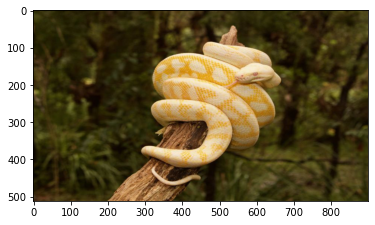

In [232]:
#Cargamos la imagen de Prueba
img1 = cv2.imread('pythonreal.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

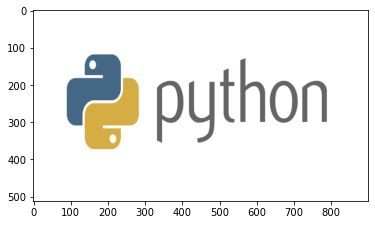

In [233]:
#Cargamos la imagen de Prueba
img2 = cv2.imread('Pythonlogo.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

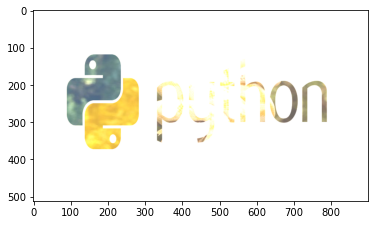

In [76]:
Added=cv2.add(img2,img1) 
plt.imshow(Added)

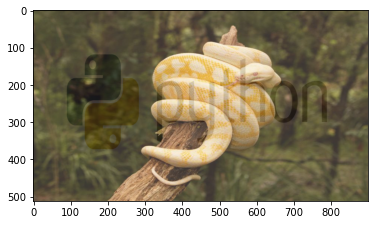

In [234]:
Added=Operaciones_Imagen(img1,img2,"SUMA",0.8,0.2) 
plt.imshow(Added.astype('uint8'))

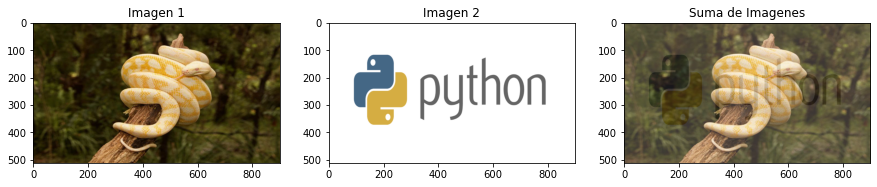

In [240]:
# Vemos las dos Imagenes para comparar
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False)
axes[0].set_title("Imagen 1")
axes[0].imshow(img1)
axes[1].set_title("Imagen 2")
axes[1].imshow(img2)
axes[2].set_title("Suma de Imagenes")
axes[2].imshow(Added)
plt.show()

In [188]:
print(img1[1,1])
print(img2[1,1])
Added.shape

[57 53 18]
[255 255 255]


(512, 900, 3)

In [191]:
#Cargamos la imagen de Prueba
img1 = cv2.imread('ImgDif1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#Cargamos la imagen de Prueba
img2 = cv2.imread('ImgDif2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

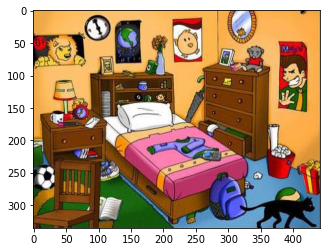

In [115]:
plt.imshow(img1)

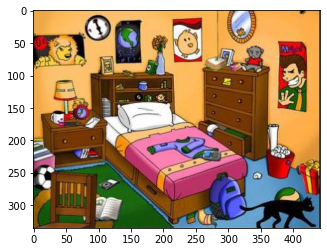

In [116]:
plt.imshow(img2)

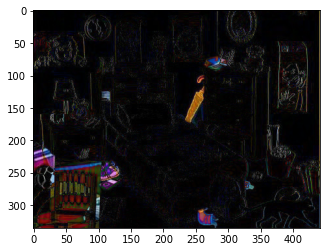

In [201]:
Substracted=Operaciones_Imagen2(img1,img2,"RESTA") 
plt.imshow(Substracted)

In [146]:
print(img1[1,1],img2[1,1])
Substracted[1,1]

[239 168  76] [240 176  89]


array([0, 0, 0], dtype=uint8)

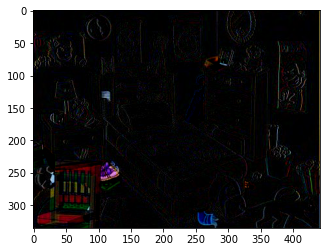

In [145]:
Substracted=cv2.subtract(img1,img2)
plt.imshow(Substracted)

In [216]:
#Cargamos la imagen de Prueba
img1 = cv2.imread('shapes1.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#Cargamos la imagen de Prueba
img2 = cv2.imread('shapes2.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

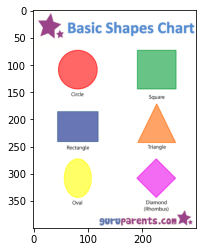

In [229]:
plt.imshow(img2)

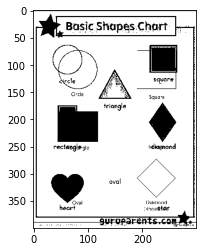

In [231]:

AndOperation=Operaciones_Imagen2(img1,img2,"AND") 
plt.imshow(AndOperation,cmap='gray')



Problema # 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [241]:
from mpl_toolkits.mplot3d import Axes3D

##Desarrollo de la función que que nos muestre una imagen en 3 Dimensiones - La imagen esta en Escala de Grises
def grayscale_3DImage(imagen1):

    #Se asume lo siguiente:
    ## - Las imagenes ya fueron obtenidas y se encuentran como un Tensores(matriz)
    ## - Las imagenes esta en formato en escala de Grises
    ## - Para Facilidad - Las imagenes tienen el mismo tamaño
    
    #Por seguridad - En caso la Imagen viniera en formato RGB
    #Vemos las Dimensiones de la Imagen, si aún es una imagen a color se convierte a escala de Grises
    if imagen1.ndim > 2:
        imagen1 = cv2.cvtColor(imagen1, cv2.COLOR_RGB2GRAY)
        
    #Generamos un meshgrid and graficamos los pixel en el eje z axis
    xx, yy = np.mgrid[0:imagen1.shape[0], 0:imagen1.shape[1]]
    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, imagen1 ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=2)
    ax.view_init(80, 30)
    plt.show()

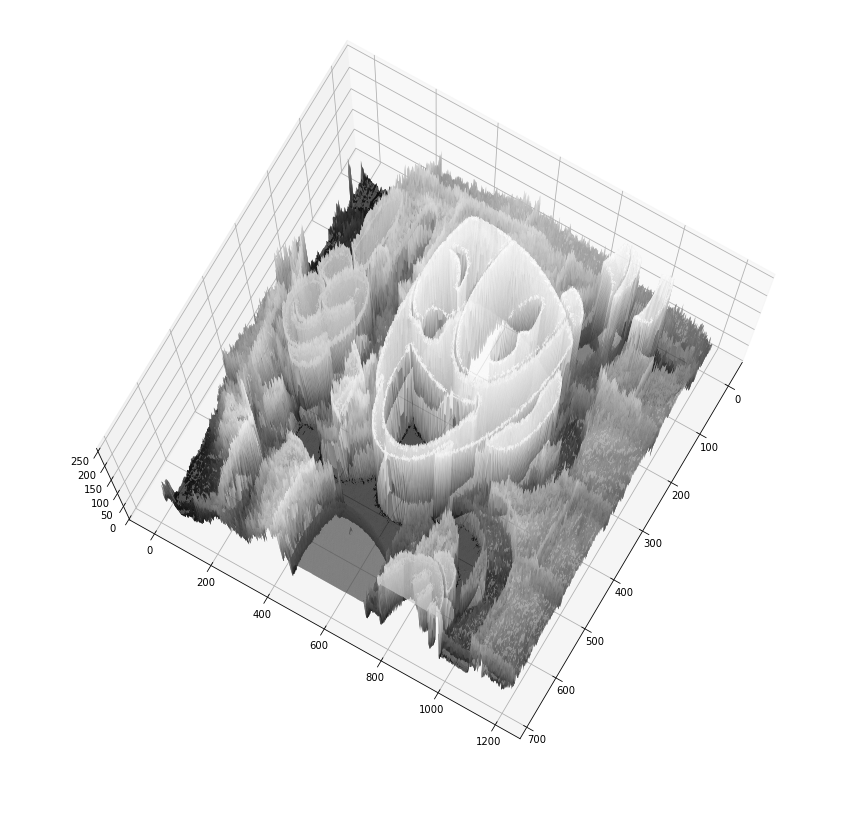

In [243]:
#Cargamos la imagen de Prueba
img = cv2.imread('cuphead.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayscale_3DImage(img)

Problema #4:

Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal,logarítmica y exponencial.

In [27]:
import math

#Operación Logaritmica
def logTransform(c, f):
    g = c * math.log(float(1 + f),10)
    return g

#Operación Logaritmica
def ExpTransform(BASE,c, f):
    g = c * (math.pow(BASE, f) - 1)
    return g

##Desarrollo de la función que nos permitirá transformar una imagen recibida
def Transformación_Imagen(imagen, tipo_Transformacion, ganancia=1.5, offset=20):

    #Se asume lo siguiente:
    ## - La imagen ya fue obtenida y se encuentran como un Tensor(matriz)
    ## - La imagen esta en formato RGB
    
    ##La operación a realizar dependerá del parametro tipo_Transformacion
    ##Podrá tener los siguientes valores
    ##"Negativa" -> Transformación Negativa
    ##"Lineal" -> Transformación Lineal
    ##"Logaritmica" -> Transformacion Logaritmica
    ##"Exponencial" -> Transformacion Exponencial
    
    #Determinamos el ancho y largo
    #Se asume que ambas imagenes tienen el mismo ancho y largo - Por facilidad
    ancho = imagen.shape[0]
    alto = imagen.shape[1]
    
    #Aquí almacenaremos la imagen binarizada
    Imagen_transformada= np.zeros((ancho, alto,3))
    
    #Si hacemos la operación Negativa
    if tipo_Transformacion == "Negativa":
        
        #Además de la suma vamos a usar los parametros de Transparencia de la imagen para
        #mejorar la visualización de las mismas
        Imagen_transformada= 255-imagen
        
    #Si hacemos la operación Linel
    if tipo_Transformacion == "Lineal":
        
        #Parametros
        #ganancia=0.5
        #offset=20
        
        #Además de la suma vamos a usar los parametros de Transparencia de la imagen para
        #mejorar la visualización de las mismas
        Imagen_transformada= ganancia*imagen+ offset
    
    #Si hacemos la operación Logaritmica
    elif tipo_Transformacion == "Logaritmica":
        #Dejamos por defecto los máximos/Minimos de la función logaritmica
        outputMax = 255
        inputMax=255      
        
        #Seteamos la constante
        c = outputMax/math.log(inputMax+1,10)
        
        #Recorremos cada pixel de la imagen
        for i in range(0, ancho):
            for j in range(0, alto):
                #Obtenemos el Pixel
                pixel= imagen[i, j]
                #Se hace manual ya que al ser tipo de dato uInt da algunos resultados que se me ha dificultado manejar
                imgR = round(logTransform(c, pixel[0]))
                imgG = round(logTransform(c, pixel[1]))
                imgB = round(logTransform(c, pixel[2]))
                Imagen_transformada[i,j] = np.array([imgR,imgG,imgB])
                
    #Si hacemos la operación Logaritmica
    elif tipo_Transformacion == "Exponencial":
        #Dejamos por defecto los máximos/Minimos de la función logaritmica
        outputMax = 255
        inputMax=255  
        BASE = 1.02
        
        #Seteamos la constante
        c = outputMax / (math.pow(BASE, inputMax) - 1); 
        
        #Recorremos cada pixel de la imagen
        for i in range(0, ancho):
            for j in range(0, alto):
                #Obtenemos el Pixel
                pixel= imagen[i, j]
                #Se hace manual ya que al ser tipo de dato uInt da algunos resultados que se me ha dificultado manejar
                imgR = round(ExpTransform(BASE,c, pixel[0]))
                imgG = round(ExpTransform(BASE,c, pixel[1]))
                imgB = round(ExpTransform(BASE,c, pixel[2]))
                Imagen_transformada[i,j] = np.array([imgR,imgG,imgB])
                
    #Retornamos la imagen transformada
    return Imagen_transformada.astype('uint8')

In [28]:
#Cargamos la imagen de Prueba
img = cv2.imread('HollowKnight.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
NegTrans = Transformación_Imagen(img,"Negativa")
LinTrans = Transformación_Imagen(img,"Lineal",1.5,20)
logTrans = Transformación_Imagen(img,"Logaritmica")
ExpTrans = Transformación_Imagen(img,"Exponencial")

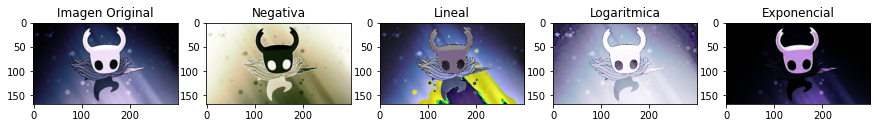

In [29]:
f, axes = plt.subplots(1, 5, figsize=(15, 5), sharex=False)
axes[0].set_title("Imagen Original")
axes[0].imshow(img)
axes[1].set_title("Negativa")
axes[1].imshow(NegTrans)
axes[2].set_title("Lineal")
axes[2].imshow(LinTrans)
axes[3].set_title("Logaritmica")
axes[3].imshow(logTrans)
axes[4].set_title("Exponencial")
axes[4].imshow(ExpTrans)
plt.show()

In [63]:
def convolutional_filter(imagen, kernel):
    
    #Determinamos la medida de la imagen
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    #Ancho y Largo del Kernel
    altoKernel = kernel.shape[0]
    anchoKernel = kernel.shape[1]
    
    #parte entera del centro del kernel
    step = int(anchoKernel/2)
    
    #Aqui almacenaremos la nueva imagen
    newImg = np.zeros((alto, ancho,3))
    
    #Convulsionamos la imagen en base al Kernel recibido
    for i in range(step, alto - step):
        newPixelR = 0
        newPixelG = 0
        newPixelB = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixelR = 0
            newPixelG = 0
            newPixelB = 0
            
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    
                    newPixelR = newPixelR + ventana[m, n][0] * kernel[m, n]
                    newPixelG = newPixelG + ventana[m, n][1] * kernel[m, n]
                    newPixelB = newPixelB + ventana[m, n][2] * kernel[m, n]
                    
            #print(newPixelR,newPixelG,newPixelB)
            newImg[i, j] = [newPixelR,newPixelG,newPixelB]
    return newImg.astype('uint8')

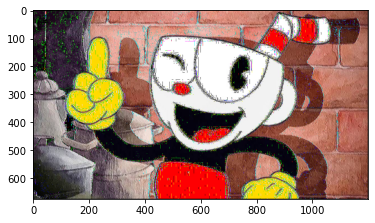

In [65]:
img = cv2.imread('cuphead.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
kernel = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])
#kernel = np.array([[-2,-2, -2], [-2, 32, -2], [-2, -2, -2]])
imgtr=convolutional_filter(img, kernel)
plt.imshow(imgtr)

In [40]:
kernel.shape

altoKernel = len(kernel[:,0])
anchoKernel = len(kernel[0,:])
print(altoKernel,anchoKernel)

3 3
